import

In [31]:
#importing modules needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [26]:
#loading the dataset
df1=pd.read_csv("energydata_complete.csv")

In [28]:
#cleaning the dataset
df1["date"]=pd.to_datetime(df1["date"])
df1["month"]=df1["date"].dt.month
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

The dataset has no null values and all columns have the correct datatype
The dataset has 19735 rows and 29 columns

In [16]:
df1.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


CORRELATION

C:\Users\User\AppData\Local\Temp\ipykernel_14028\4211675011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df1.corr(),annot=True, fmt=".2f");


Text(0.5, 1.0, 'A scatter plot showing correlation between all the variables on the daatframe')

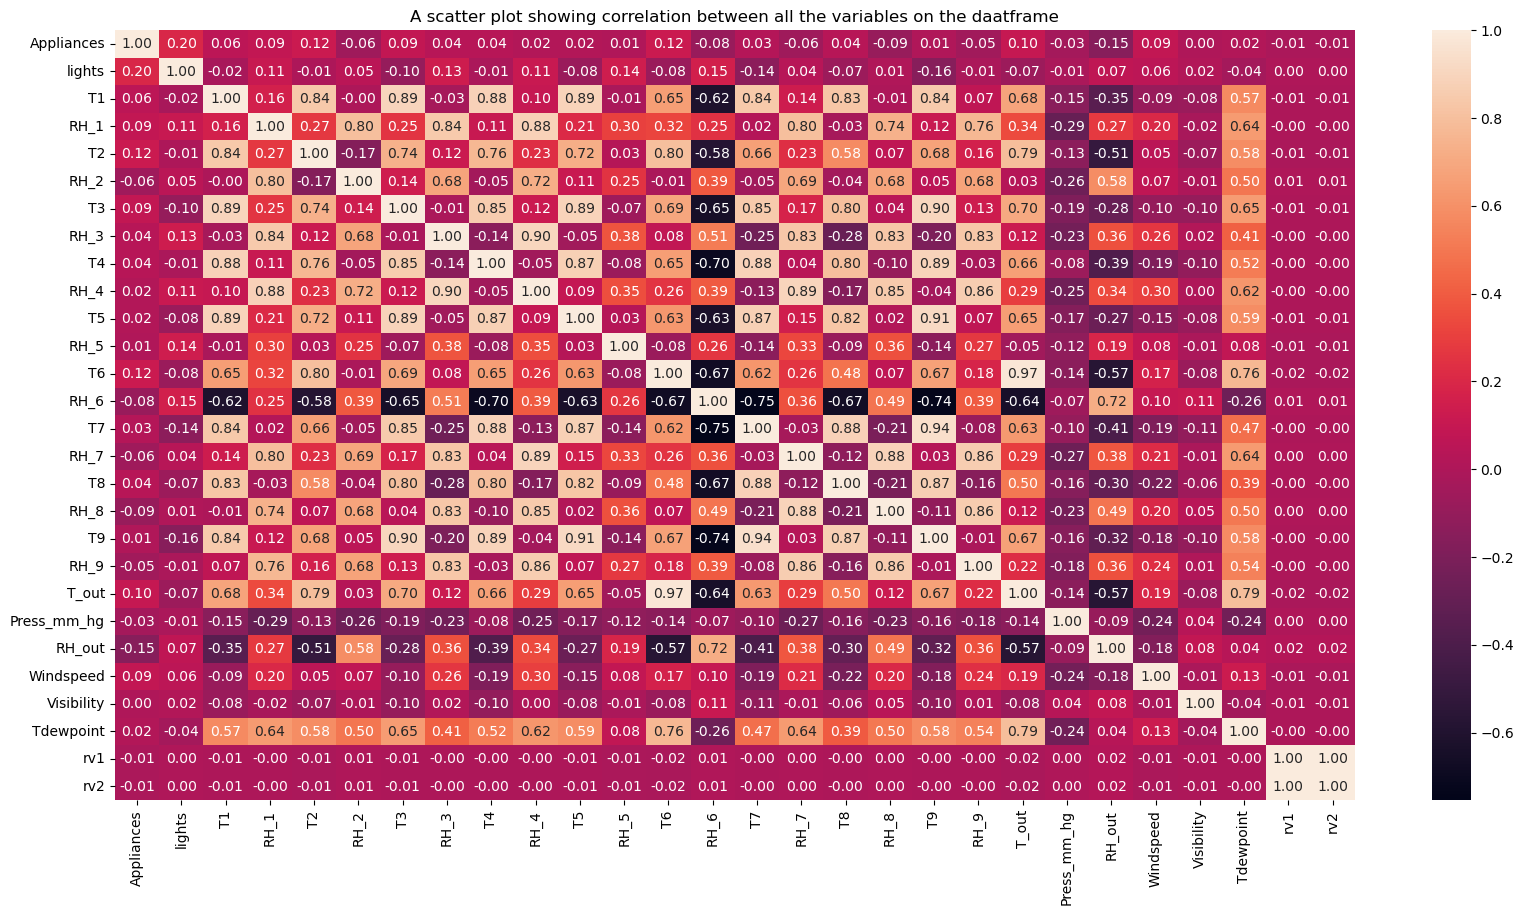

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(data=df1.corr(),annot=True, fmt=".2f");
plt.title("A scatter plot showing correlation between all the variables on the daatframe")

Question 12: From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p

In [68]:
df2=df1.copy()
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(df2.drop(columns=["date", "lights"])),  
               columns=df2.drop(columns=['date', 'lights']).columns)
y=x.drop(columns=["Appliances"])
y2=x["Appliances"]
x_train, x_test, y_train, y_test = train_test_split(y,y2,test_size=.3, random_state=42)
#fitting the model
linear = LinearRegression()
linear.fit(x_train[['T2']], x_train["T6"])
t6_pred = linear.predict(x_test[['T2']])
r2=r2_score(x_test["T6"], t6_pred)
round(r2,2)

0.64


question 13: Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places

In [74]:
linear.fit(x_train, y_train)
prediction=linear.predict(x_test)
mae_13=mean_absolute_error(y_test, prediction)
round(mae_13, 2)

0.05

question 14: What is the Residual Sum of Squares (in two decimal places)?

In [76]:
rss_14=np.sum(np.square(y_test-prediction))
round(rss_14, 2)

45.25

question 15:What is the Root Mean Squared Error (in three decimal places)?

In [77]:
rmse_15=np.sqrt(mean_squared_error(y_test,prediction))
round(rmse_15, 3)

0.087

question 16: What is the Coefficient of Determination (in two decimal places)?

In [78]:
cod_16=r2_score(y_test, prediction)
round(cod_16, 2)

0.15

question 17: Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?


In [92]:
def features_weight(models, features, col):
    model_weights = pd.Series(models.coef_, features.columns).sort_values()
    df_model_weights = pd.DataFrame(model_weights).reset_index()
    df_model_weights.columns = ['columns_2', col]
    df_model_weights[col].round(2)
    return df_model_weights
weights_of_linear_model=features_weight(linear, x_train,"weghts_of_linear_model")
weights_of_linear_model.iloc[0],weights_of_linear_model.iloc[-1]


(columns_2                     RH_2
 weghts_of_linear_model   -0.452403
 Name: 0, dtype: object,
 columns_2                     RH_1
 weghts_of_linear_model    0.553749
 Name: 26, dtype: object)

Question 18: Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [94]:
ridge=Ridge(alpha=0.4)
ridge.fit(x_train, y_train)
ridge_y_predict = ridge.predict(x_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_y_predict))
round(ridge_rmse, 3)

0.087

Question 19: Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [106]:
lasso = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)
def lasso_weights(models, features, col):
    weights_model = pd.Series(models.coef_, features.columns).sort_values()
    weights_dataframe = pd.DataFrame(weights_model).reset_index()
    weights_dataframe.columns = ['Features', col]
    weights_dataframe[col].round(2)
    return weights_dataframe
lasso_weight = lasso_weights(lasso, x_train,'Lasso_weights')

non_zero_weights = lasso_weight[lasso_weight['Lasso_weights']!= 0]
non_zero_weights

,Features,Lasso_weights
0,RH_out,-0.050882
1,month,-0.006761
2,RH_8,-0.003461
25,T2,0.004511
26,RH_1,0.019894


Question 20: What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [108]:
lasso_predict = lasso.predict(X_test)
mse_20 = mean_squared_error(y_test, lasso_predict)
rmse_20 = np.sqrt(mse_20)
round(rmse_20,3)


C:\Users\User\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


0.093